# Chatbot LangGraph


In [1]:
! pip install langgraph langsmith


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.5/113.5 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.9/296.9 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.0/408.0 kB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.8 MB/s eta 0:00:00


In [2]:
!pip install langchain langchain_groq langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.9 MB/s eta 0:00:00


In [3]:
from google.colab import userdata

In [7]:
groq_api_key = userdata.get('GROQ_API_KEY')
langsmith_api_key = userdata.get('LANGSMITH_API_KEY')

In [8]:
import os
os.environ['LANGCHAIN_API_KEY'] = langsmith_api_key
os.environ['GROQ_API_KEY'] = groq_api_key
os.environ['LANGCHAIN_TRACING_V2'] = 'true'
os.environ['LANGCHAIN_PROJECT'] = 'Langgraph_test'

In [9]:
from langchain_groq import ChatGroq
llm = ChatGroq(groq_api_key=groq_api_key, model_name="Gemma2-9b-It")

## ChatBot ?


In [10]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [11]:
class State(TypedDict):
  messages:Annotated[list,add_messages] # appending the messages to the list


graph_builder = StateGraph(State)


In [12]:
graph_builder

In [13]:
def groqchatbot(state:State):
  return {"messages":llm.invoke(state['messages'])}

In [14]:
graph_builder.add_node("groqchatbot", groqchatbot)

In [15]:
graph_builder

In [16]:
graph_builder.add_edge(START, "groqchatbot")
graph_builder.add_edge("groqchatbot", END)

In [17]:
graph = graph_builder.compile()

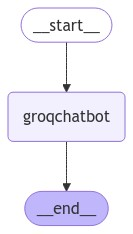

In [21]:
from IPython.display import Image,display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [22]:
while True:
  user_input = input("User: ")
  if user_input.lower() in ['quit','q']:
    print("Bot: Goodbye!")
    break
  for event in graph.stream({"messages":("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value["messages"])
      print("Assistant:", value["messages"].content)

User: Hi
dict_values([{'messages': AIMessage(content='Hi there! 👋 \n\nWhat can I do for you today? 😊\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 10, 'total_tokens': 28, 'completion_time': 0.032727273, 'prompt_time': 4.4e-07, 'queue_time': 0.132904359, 'total_time': 0.032727713}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-f5bfe488-ab02-40f2-95bf-239b3412de60-0', usage_metadata={'input_tokens': 10, 'output_tokens': 18, 'total_tokens': 28})}])
content='Hi there! 👋 \n\nWhat can I do for you today? 😊\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 10, 'total_tokens': 28, 'completion_time': 0.032727273, 'prompt_time': 4.4e-07, 'queue_time': 0.132904359, 'total_time': 0.032727713}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-f5bfe4